# Practical applications of Monte Carlo in board games

This code simulates a fight between two armies situated on a tabletop field. There are two fictional armies "The Orcs" and "The Ghosts". Each army consists of only one type of unit, however "Orcs" and "Ghosts" are worth different amount of points. The goal of the game is to destroy the opposing army, that means to lower their unit point score to zero. The armies flip a coin and whoever wins, attacks first. This repeats until one of the armies is exhausted. 
The problem that this simulation is trying to solve is as following. There is much more units in the "Orc" army, however this army is much weaker (costs less points) that the "Ghost" army. To tip the scales, the game allows "Orcs" to use ability "Stab". This increases their chance to vanquish "Ghosts", but also increases their chance to be destroyed. This simulation is trying to prove, whether it is optimal for "Orc" player to always "Stab" or not. The main goal is maximizing their chance to win in X amount of games.


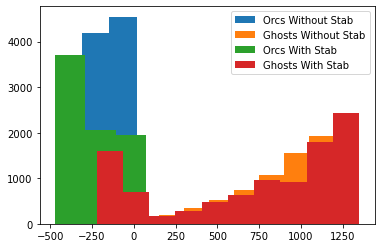

Kill rate without stab: 0.5
Kill rate with stab: 0.75
Death rate without stab: 0.08333333333333333
Death rate with stab: 0.1388888888888889
Ghost to Orc ratio: 1.6666666666666667
Orcs won without stab percentage: 12.659999999999998
Ghosts won without stab percentage: 87.33999999999999
Ghosts won with stab percentage: 77.25999999999999
Orcs won with stab percentage: 22.74


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set the seed for reproducibility
SEED = 42
Number_of_iterations = 10000
Number_of_iterations2 = 10000

# Main information
random.seed(SEED)
ghosts = 90
stab_success = 1/2
kill_without_stab = 1/2
kill_with_stab = 1/2 + 1/2*1/2  # Adding a flipped coin
risk_with_stab = (1/6*2/6) + 1/6*1/2
risk_without_stab = 1/6*1/2
ghost_points = 15
ghost_orc_ratio = 15/9
orcs = 150
enemies = 9
random_events = []

# Create lists to store values for each simulation
value_orcs = []
value_ghosts = []
value_orcs_without_stab = []
value_ghosts_without_stab = []

# With stab
for i in range(Number_of_iterations):
    # Initialize orc and ghost values to their initial values
    orcs = 150
    ghosts = 90
    # Simulate until either orcs or ghosts are exhausted
    while (orcs and ghosts) <= 150 and (orcs and ghosts) > 0:
        random_event = random.randint(1, 2)
        if random_event == 1:  # ghosts win
            orcs = orcs - (ghosts) * kill_with_stab
        else:  # orcs win
            ghosts = ghosts - (orcs) * risk_with_stab
        if (orcs or ghosts) <= 0:
            break
    # Save orc and ghost values to lists for further processing
    value_orcs.append(orcs * 9)
    value_ghosts.append(ghosts * 15)

# Without stab
for i in range(Number_of_iterations2):
    # Initialize orc and ghost values to their initial values
    orcs_without_stab = 150
    ghosts_without_stab = 90
    # Simulate until either orcs or ghosts are exhausted
    while (orcs_without_stab and ghosts_without_stab) <= 150 and (orcs_without_stab and ghosts_without_stab) > 0:
        random_event = random.randint(1, 2)
        if random_event == 1:  # ghosts win
            orcs_without_stab = orcs_without_stab - (ghosts_without_stab) * kill_without_stab
        else:  # orcs win
            ghosts_without_stab = ghosts_without_stab - (orcs_without_stab) * risk_without_stab
        if (orcs_without_stab or ghosts_without_stab) <= 0:
            break
    # Save orc and ghost values to lists for further processing
    value_orcs_without_stab.append(orcs_without_stab * 9)
    value_ghosts_without_stab.append(ghosts_without_stab * 15)

# Plot histograms for the simulations
plt.hist(value_orcs_without_stab, label='Orcs Without Stab')
plt.hist(value_ghosts_without_stab, label='Ghosts Without Stab')
plt.hist(value_orcs, label='Orcs With Stab')
plt.hist(value_ghosts, label='Ghosts With Stab')
plt.legend()
plt.show()

# Print kill rates and death rates
print("Kill rate without stab:", kill_without_stab)
print("Kill rate with stab:", kill_with_stab)
print("Death rate without stab:", risk_without_stab)
print("Death rate with stab:", risk_with_stab)
print("Ghost to Orc ratio:", ghost_orc_ratio)

# Calculate the percentage of wins for orcs and ghosts
orc_wins_percentage = sum(1 for value in value_orcs if value > 0) / Number_of_iterations * 100
ghost_wins_percentage = sum(1 for value in value_ghosts if value > 0) / Number_of_iterations * 100

# Calculate the percentage of wins for orcs and ghosts without stab
orc_wins_percentage_without_stab = sum(1 for value in value_orcs_without_stab if value > 0) / Number_of_iterations2 * 100
ghost_wins_percentage_without_stab = sum(1 for value in value_ghosts_without_stab if value > 0) / Number_of_iterations2 * 100

# Print the results
print("Orcs won without stab percentage:", orc_wins_percentage_without_stab)
print("Ghosts won without stab percentage:", ghost_wins_percentage_without_stab)
print("Ghosts won with stab percentage:", ghost_wins_percentage)
print("Orcs won with stab percentage:", orc_wins_percentage)
